In [1]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
From (redirected): https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5&confirm=t&uuid=8aef2fa0-0dab-439a-b229-618ff6a813eb
To: /content/horse-or-human.zip
100% 150M/150M [00:01<00:00, 75.1MB/s]


In [2]:
import os
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [4]:
# directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')
# directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')


In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse16-1.png', 'horse49-1.png', 'horse44-8.png', 'horse35-8.png', 'horse34-9.png', 'horse08-9.png', 'horse40-9.png', 'horse26-3.png', 'horse08-1.png', 'horse46-4.png']
['human04-02.png', 'human10-01.png', 'human04-18.png', 'human06-24.png', 'human15-23.png', 'human17-23.png', 'human07-12.png', 'human10-02.png', 'human06-01.png', 'human08-13.png']


In [9]:
print('ttl training horse imgs :',len(os.listdir(train_horse_dir)))
print('ttl training human imgs :',len(os.listdir(train_human_dir)))

ttl training horse imgs : 500
ttl training human imgs : 527


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4
pic_index = 0

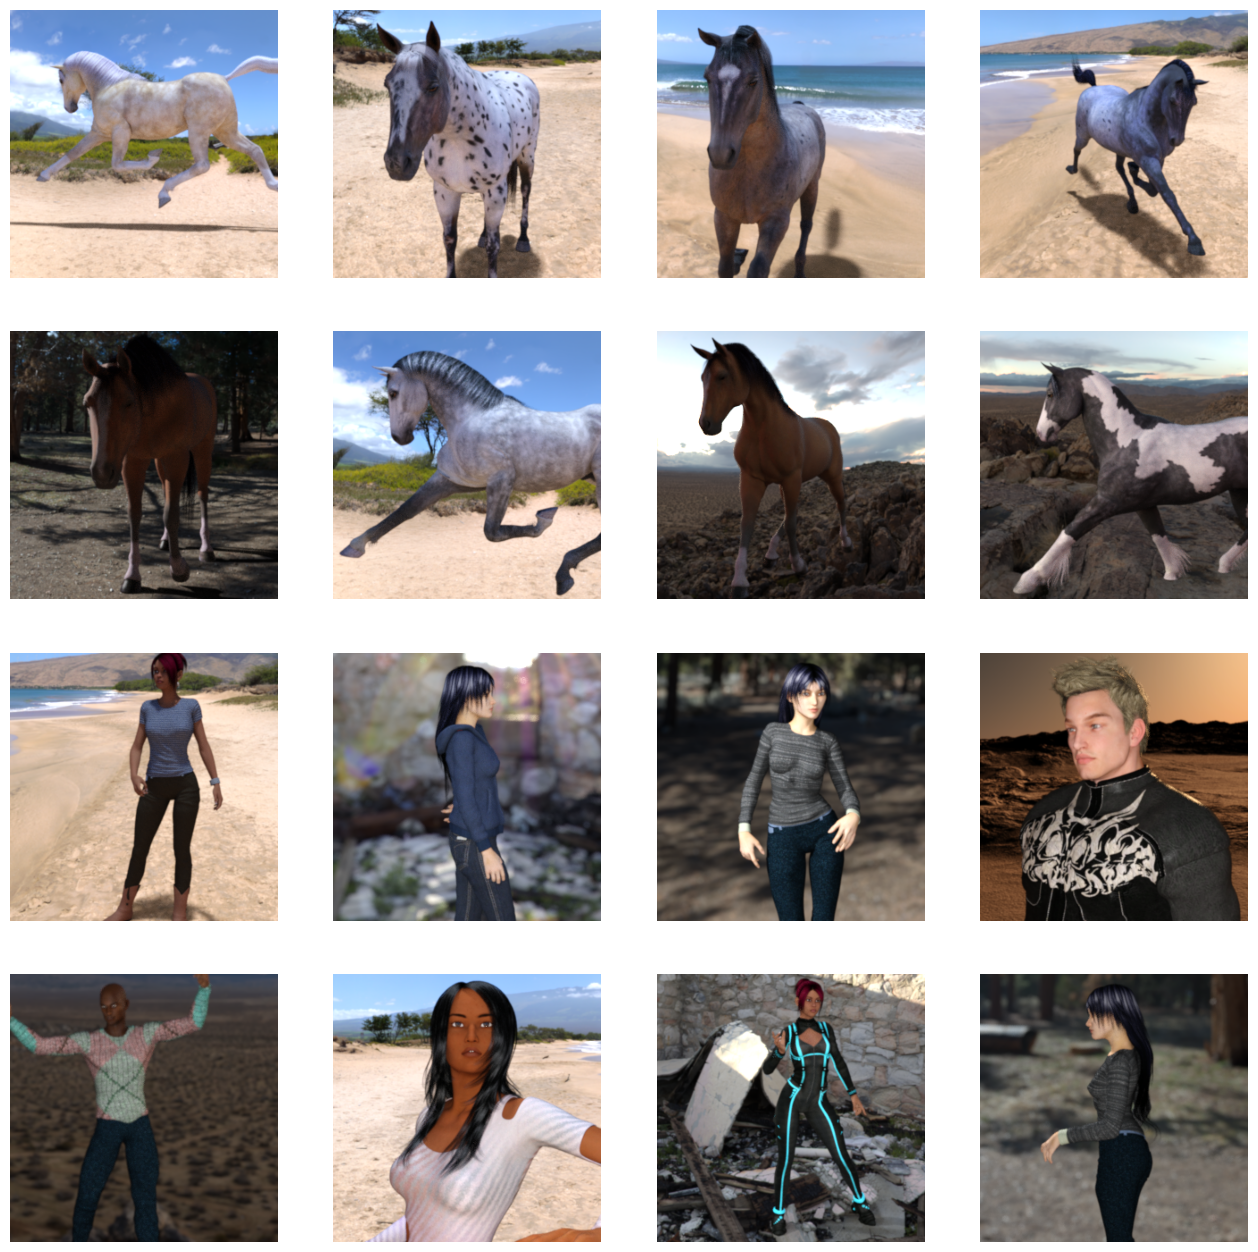

In [16]:
fig = plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                 for fname in train_horse_names[pic_index-8:pic_index]]

next_human_pix = [os.path.join(train_human_dir, fname)
                 for fname in train_human_names[pic_index-8:pic_index]]

for i,img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**Creating Neural Network**

In [21]:
import tensorflow as tf
from tensorflow import keras

In [25]:
model= tf.keras.models.Sequential([
        # here we are making our images lighter in weights along with quality and image specification by using Conv and Maxpooling functions to reduce the load of images on machine.
        tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (300, 300, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        # 2nd Conv
        tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # 3rd Conv
        tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2,),
        # 4th Conv
        tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # 5th Conv
        tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # Making NN
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation ='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')

])
# here we utilizes the sigmoid function which is used for binary results. We can also use softmax in this place but the difference is at the point of layers. We have to put 2 layers than the singlke layer in sigmoid function.


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 149, 149, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 35, 35, 64)       

In [31]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255)
train_generator = train_datagen.flow_from_directory('./horse-or-human/', target_size=(300, 300), batch_size = 128, class_mode = 'binary')

Found 1027 images belonging to 2 classes.


In [37]:
Predictions = model.fit(train_generator, steps_per_epoch=3, epochs = 15, verbose = 1)

Epoch 1/15
3/3 [==============================] - 16s 893ms/step - loss: 0.7046 - accuracy: 0.5328
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.7771 - accuracy: 0.5019
Epoch 3/15
3/3 [==============================] - 5s 1s/step - loss: 0.6903 - accuracy: 0.5156
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6870 - accuracy: 0.6380
Epoch 5/15
3/3 [==============================] - 4s 2s/step - loss: 0.6792 - accuracy: 0.5052
Epoch 6/15
3/3 [==============================] - 3s 948ms/step - loss: 0.6722 - accuracy: 0.5443
Epoch 7/15
3/3 [==============================] - 3s 945ms/step - loss: 0.6574 - accuracy: 0.7240
Epoch 8/15
3/3 [==============================] - 3s 935ms/step - loss: 0.5659 - accuracy: 0.6823
Epoch 9/15
3/3 [==============================] - 2s 467ms/step - loss: 0.8405 - accuracy: 0.5019
Epoch 10/15
3/3 [==============================] - 2s 529ms/step - loss: 0.6468 - accuracy: 0.5367
Epoch 11/15
3/3 [=============

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
 path = '/content/' + fn
 img = image.load_img(path, target_size=(300,300))
 x = image.img_to_array(img)
 x = np.expand_dims(x, axis = 0)

 images = np.vstack([x])
 classes = model.predict(images, batch_size = 10)
 print(classes[0])
 if classes[0]>0.5:
  print(fn + "is a human")
 else:
  print(fn + " is a horse")